# ML4DS - Pandas Intro

In this second tutorial we will have a look at the pandas library and how to use it to get to know your data. Again, this tutorial only covers a few basics and is far from complete. You can find more detailed tutorials
[here](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html). There is also a nice 
[Cheatsheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) available.

Lets get started by importing pandas:

In [1]:
import pandas as pd

*The pandas library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the DataFrame, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

The two useful data structures we will mainly use are:
* [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) objects. A Series object is a 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).

## Series
We can create series objects in many different ways. To get an overview of all the options, have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro).

In [2]:
s = pd.Series([1, 3, 5, 1, 6, 8]) # from list
print(s)
s = pd.Series([1, 3, 5, 1], index=["alice", "bob", "charles", "darwin"]) # including index labels
print(s)

0    1
1    3
2    5
3    1
4    6
5    8
dtype: int64
alice      1
bob        3
charles    5
darwin     1
dtype: int64


In [3]:
s = pd.Series({'b': 1, 'a': 0, 'c': 2}) #from dict
s

b    1
a    0
c    2
dtype: int64

Series act very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [4]:
import numpy as np
np.exp(s)

b    2.718282
a    1.000000
c    7.389056
dtype: float64

In [5]:
s + s

b    2
a    0
c    4
dtype: int64

In [6]:
s[:2]

b    1
a    0
dtype: int64

A Series is also like a fixed-size dict which means you can get and set values by index label:

In [7]:
s['a']

0

In [8]:
'b' in s

True

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [9]:
print(s)
print('accessing index label "a":', s.loc['a'])
print('accessing integer location 1:', s.iloc[1])

b    1
a    0
c    2
dtype: int64
accessing index label "a": 0
accessing integer location 1: 0


When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels. If some index label is not present in one of the involved `Series` the result will be `NaN` (Not-a-Number means missing), so dont forget to set the right index labels to avoid surprising results.

In [10]:
print(s)
s2 = pd.Series({'a': 1, 'c': 9, 'b':3, 'd':24})
print(s2)
print(s + s2)

b    1
a    0
c    2
dtype: int64
a     1
c     9
b     3
d    24
dtype: int64
a     1.0
b     4.0
c    11.0
d     NaN
dtype: float64


## DataFrame
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
* Dict of 1D arrays, lists, dicts or Series
* 2D numpy arrays
* Series
* Another DataFrame
* ...

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

In [11]:
df = pd.DataFrame({'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

In [12]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [13]:
df.columns

Index(['one', 'two'], dtype='object')

Pandas includes many functions to read a DataFrame from a variety of data formats:
* `pd.read_csv`
* `pd.read_json`
* `pd.read_sql`
* ...

See [Pandas I/O documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) for more.

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" # download link of a csv file
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class-label']
df = pd.read_csv(url, names=names)

## Viewing data
Here is how to view the top and bottom rows of the frame:

In [15]:
df.head()

sepal-length  sepal-width  petal-length  petal-width  class-label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [16]:
df.tail()

sepal-length  sepal-width  petal-length  petal-width     class-label
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

You can also take a random sample like this:

In [17]:
df.sample(5)

sepal-length  sepal-width  petal-length  petal-width      class-label
3             4.6          3.1           1.5          0.2      Iris-setosa
118           7.7          2.6           6.9          2.3   Iris-virginica
85            6.0          3.4           4.5          1.6  Iris-versicolor
103           6.3          2.9           5.6          1.8   Iris-virginica
108           6.7          2.5           5.8          1.8   Iris-virginica

The `info` function gives you a concise summary of a DataFrame:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class-label     150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Selection
Selecting a single column yields a Series:

In [19]:
df['sepal-length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal-length, dtype: float64

Selecting via [], which slices the rows:

In [20]:
df[0:3]

sepal-length  sepal-width  petal-length  petal-width  class-label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa

Access by label with `loc`:

In [21]:
df.loc[1,'sepal-length']

4.9

To access entries by position, make use of `iloc`:

In [22]:
df.iloc[0:3]

sepal-length  sepal-width  petal-length  petal-width  class-label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa

In [23]:
df.iloc[0:3, -2:]

petal-width  class-label
0          0.2  Iris-setosa
1          0.2  Iris-setosa
2          0.2  Iris-setosa

We can use Boolean Indexing to make conditional selections:

In [24]:
df[df['sepal-length'] > 7.5]

sepal-length  sepal-width  petal-length  petal-width     class-label
105           7.6          3.0           6.6          2.1  Iris-virginica
117           7.7          3.8           6.7          2.2  Iris-virginica
118           7.7          2.6           6.9          2.3  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced) for more.

## A few useful operations

We can create a new column containing computed values like this:

In [25]:
df['width-sum'] = df['sepal-width'] + df['petal-width']
df.head()

sepal-length  sepal-width  petal-length  petal-width  class-label  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   width-sum  
0        3.7  
1        3.2  
2        3.4  
3        3.3  
4        3.8

We can apply functions to the data using `apply`:

In [26]:
def class_labels_to_int(label):
    if label == 'Iris-setosa':
        return 0
    elif label == 'Iris-versicolor':
        return 1
    elif label == 'Iris-virginica':
        return 2

df['class-label-int'] = df['class-label'].apply(class_labels_to_int)
df.sample(5)

sepal-length  sepal-width  petal-length  petal-width      class-label  \
74           6.4          2.9           4.3          1.3  Iris-versicolor   
29           4.7          3.2           1.6          0.2      Iris-setosa   
30           4.8          3.1           1.6          0.2      Iris-setosa   
96           5.7          2.9           4.2          1.3  Iris-versicolor   
58           6.6          2.9           4.6          1.3  Iris-versicolor   

    width-sum  class-label-int  
74        4.2                1  
29        3.4                0  
30        3.3                0  
96        4.2                1  
58        4.2                1

The `get_dummies` function creates a one-hot encoding for categorical columns:

In [27]:
pd.get_dummies(df).sample(5)

sepal-length  sepal-width  petal-length  petal-width  width-sum  \
43           5.0          3.5           1.6          0.6        4.1   
14           5.8          4.0           1.2          0.2        4.2   
35           5.0          3.2           1.2          0.2        3.4   
69           5.6          2.5           3.9          1.1        3.6   
63           6.1          2.9           4.7          1.4        4.3   

    class-label-int  class-label_Iris-setosa  class-label_Iris-versicolor  \
43                0                        1                            0   
14                0                        1                            0   
35                0                        1                            0   
69                1                        0                            1   
63                1                        0                            1   

    class-label_Iris-virginica  
43                           0  
14                           0  
35                           0  
69                           0  
63                           0

We can remove columns using `drop`:

In [28]:
df = df.drop(labels=['width-sum', 'class-label-int'], axis=1)
df.head()

sepal-length  sepal-width  petal-length  petal-width  class-label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Applying min-max normalization:

In [29]:
df_features = df.iloc[:, :-1]
df_norm = (df_features - df_features.mean()) / (df_features.max() - df_features.min())
df_norm.head()

sepal-length  sepal-width  petal-length  petal-width
0     -0.206481     0.185833     -0.399774    -0.416111
1     -0.262037    -0.022500     -0.399774    -0.416111
2     -0.317593     0.060833     -0.416723    -0.416111
3     -0.345370     0.019167     -0.382825    -0.416111
4     -0.234259     0.227500     -0.399774    -0.416111

## Univariate descriptors

The `describe` function computes many of the univariate descriptors for a given DataFrame, giving a nice overview of the main aggregated values over each column:
* count: number of non-null (not NaN) values
* mean: mean of non-null values
* std: standard deviation of non-null values
* min: minimum of non-null values
* 25%, 50%, 75%: 25th, 50th and 75th percentile of non-null values
* max: maximum of non-null values

In [30]:
df.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Pandas includes functions to compute data descriptors:

In [31]:
df.mean() # mean for each column

sepal-length    5.843333
sepal-width     3.054000
petal-length    3.758667
petal-width     1.198667
dtype: float64

In [32]:
df.median() # median for each column

sepal-length    5.80
sepal-width     3.00
petal-length    4.35
petal-width     1.30
dtype: float64

In [33]:
df['sepal-length'].mode() # mode for sepal-length

0    5.0
dtype: float64

In [34]:
df.std() # std for each column

sepal-length    0.828066
sepal-width     0.433594
petal-length    1.764420
petal-width     0.763161
dtype: float64

Pandas also includes functions to visualize these descriptors.

We can plot histograms for each feature:

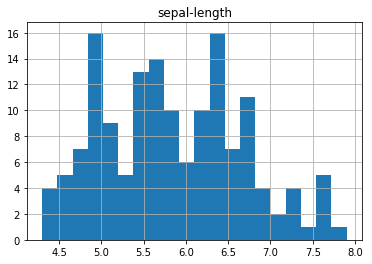

In [35]:
%matplotlib inline
df.hist(column=['sepal-length'], bins=20);

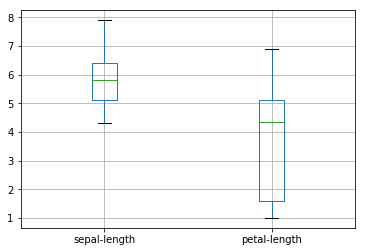

In [36]:
df.boxplot(column=['sepal-length', 'petal-length']);

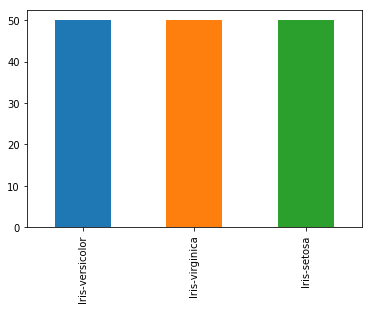

In [37]:
df['class-label'].value_counts().plot(kind='bar');

## Bivariate descriptors

Computing pairwise correlation coefficients (measuring linear association between two variables):

In [38]:
df.corr()

sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000

Visual inspection of correlation:

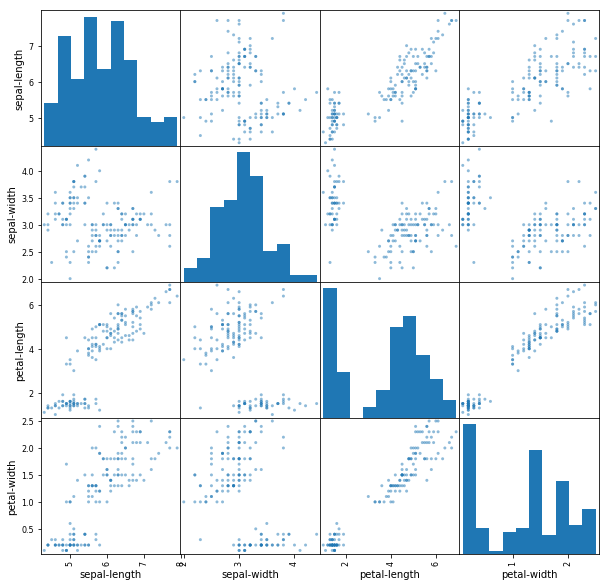

In [39]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

For categorical features, we can use `pd.crosstab` to get the contingency table:

In [40]:
df = pd.DataFrame([['blue', 'male'], ['yellow', 'female'], ['red', 'male'], ['yellow', 'male'], ['yellow', 'female'], ['red', 'male']])
df.columns = ['color', 'gender']
df

color  gender
0    blue    male
1  yellow  female
2     red    male
3  yellow    male
4  yellow  female
5     red    male

In [41]:
pd.crosstab(df['color'], df['gender'], margins=True)

gender  female  male  All
color                    
blue         0     1    1
red          0     2    2
yellow       2     1    3
All          2     4    6

## Handling Missing data


In [42]:
df = pd.DataFrame([[1,2,3],
                   [4,np.nan,6]])
df

0    1  2
0  1  2.0  3
1  4  NaN  6

To drop any rows that have missing data:

In [43]:
df.dropna(how='any')

0    1  2
0  1  2.0  3

Filling missing data with a constant:

In [44]:
df.fillna(value=5)

0    1  2
0  1  2.0  3
1  4  5.0  6

Filling missing data with column mean:

In [45]:
df.fillna(df.mean())

0    1  2
0  1  2.0  3
1  4  2.0  6

To get the boolean mask where values are nan:

In [46]:
pd.isna(df)

0      1      2
0  False  False  False
1  False   True  False

## What next?

As you probably noticed by now, pandas is quite a large library with many features. Although we went through the most important features, there is still a lot to discover. Probably the best way to learn more is to get your hands dirty with some real-life data. It is also a good idea to go through pandas' excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html).